Apply edge detection (using Canny or Sobel), line detection (using 
Hough Transform), and corner detection (using Harris) on a sample 
image. Display the results of each operation sequentially.

In [ ]:
import cv2
import numpy as np

# Load image
img = cv2.imread('image.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. Edge Detection (Canny)
edges = cv2.Canny(gray, 100, 200)

# 2. Line Detection (Hough Transform)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=10)
line_img = img.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 3. Corner Detection (Harris)
corners = cv2.cornerHarris(gray, 2, 3, 0.04)
corner_img = img.copy()
corner_img[corners > 0.01 * corners.max()] = [0, 0, 255]  # Red corners

# Display results
cv2.imshow('Original', img)
cv2.imshow('Canny Edges', edges)
cv2.imshow('Hough Lines', line_img)
cv2.imshow('Harris Corners', corner_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

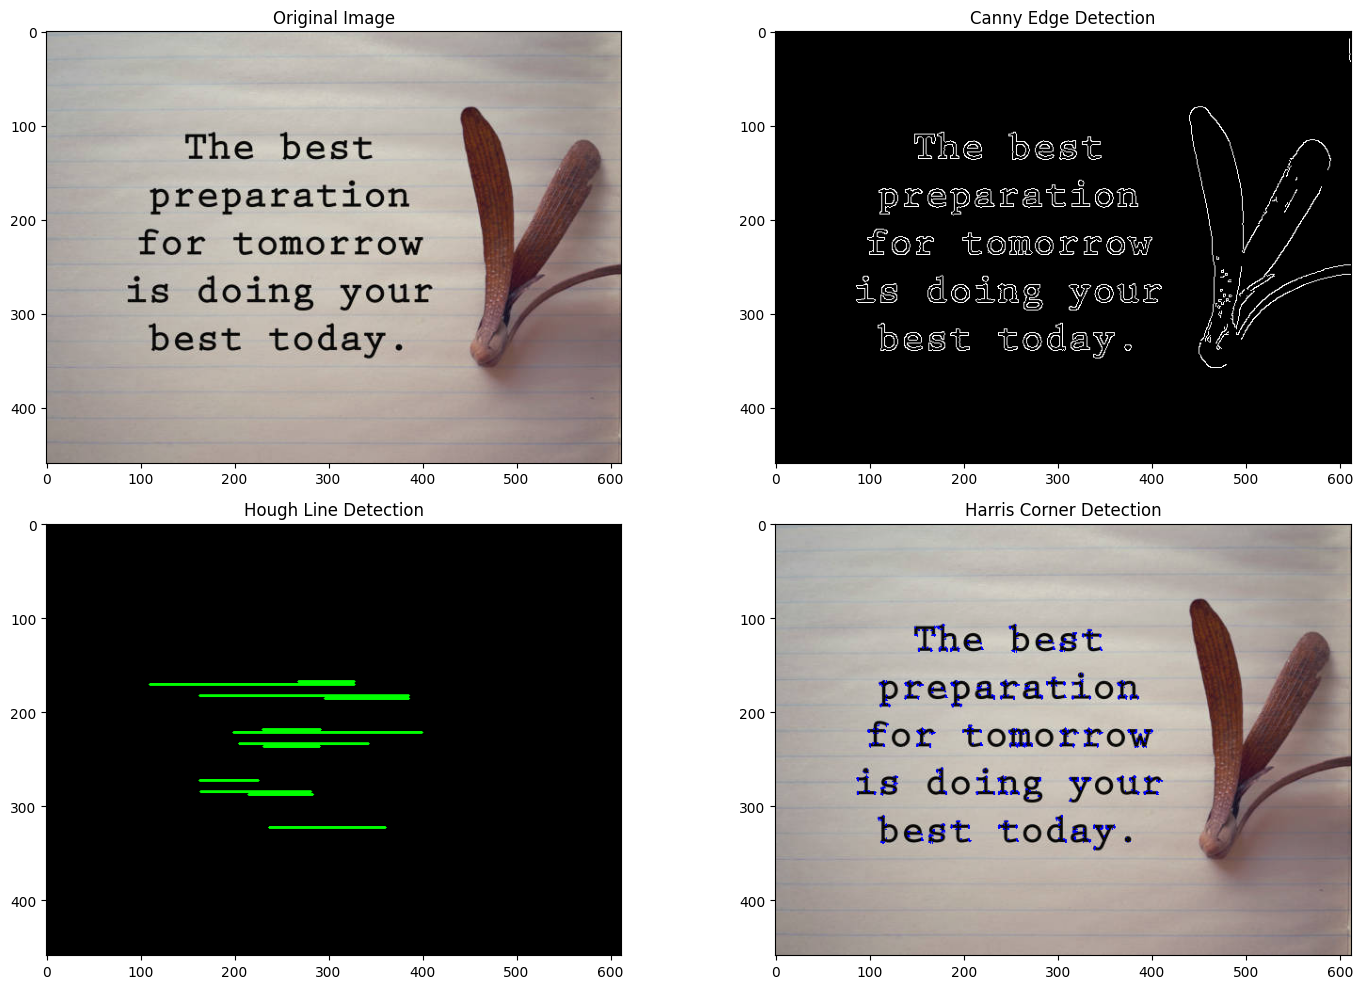

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('image.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create figure
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# 1. Edge Detection (Canny)
edges = cv2.Canny(gray, 100, 200)
plt.subplot(2, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

# 2. Line Detection (Hough Transform)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)
line_img = np.zeros_like(img)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
plt.title('Hough Line Detection')

# 3. Corner Detection (Harris)
corners = cv2.cornerHarris(gray, 2, 3, 0.04)
corner_img = np.copy(img)
corner_img[corners > 0.01 * corners.max()] = [255, 0, 0]  # Mark corners in red
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')

plt.tight_layout()
plt.show()